In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

# Data Understanding and Cleaning 

In [2]:
df=pd.read_csv("income_evaluation.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
import re

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
columns

['age',
 ' workclass',
 ' fnlwgt',
 ' education',
 ' education-num',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week',
 ' native-country',
 ' income']

In [18]:
df.count()

age                32561
 workclass         32561
 fnlwgt            32561
 education         32561
 education-num     32561
 marital-status    32561
 occupation        32561
 relationship      32561
 race              32561
 sex               32561
 capital-gain      32561
 capital-loss      32561
 hours-per-week    32561
 native-country    32561
 income            32561
dtype: int64

In [19]:
df.isnull().any()

age                False
 workclass         False
 fnlwgt            False
 education         False
 education-num     False
 marital-status    False
 occupation        False
 relationship      False
 race              False
 sex               False
 capital-gain      False
 capital-loss      False
 hours-per-week    False
 native-country    False
 income            False
dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df.columns 

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [23]:
df.columns=["age","workclass", "fnlwgt", "education", "education_num","martial_status",
            "occupation", "relationship" ,"race","sex","capital_gain",
            "capital_loss","hours_per_week","native_country","income"];
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Text(0.5, 1.0, 'Comparsion salary according to gender')

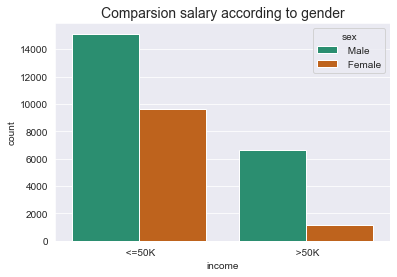

In [24]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x="income", hue="sex" ,data=df , palette="Dark2").set_title("Comparsion salary according to gender",size=14)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


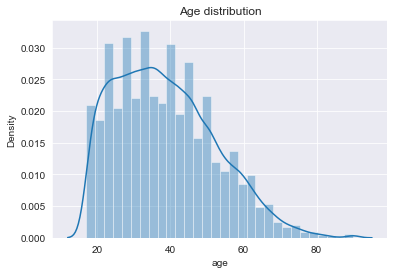

In [25]:
sns.distplot(df["age"], bins=30 ,kde=True).set_title("Age distribution");


In [26]:
df["occupation"].replace(" ?" ,value=" others" , inplace=True)

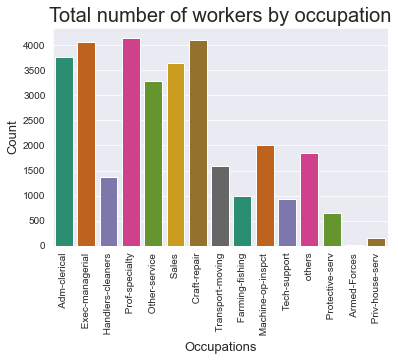

In [27]:
sns.countplot(x="occupation",data=df , palette="Dark2").set_title("Total number of workers by occupation" ,size=20)

plt.ylabel("Count" , size=13)
plt.xlabel("Occupations" , size=13)

plt.xticks(rotation="vertical");



In [28]:
df.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df["capital_gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [30]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [31]:
df["native_country"].replace(" ?" ,value=" other_ountries" , inplace=True)

In [32]:
df["native_country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' other_ountries',
       ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England',
       ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy',
       ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador',
       ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
df.drop("race",axis=1 ,inplace=True)
df.drop("native_country", axis=1,inplace=True);

In [34]:
df.drop("education",axis=1,inplace=True)

In [35]:
df.drop("relationship",axis=1,inplace=True)

In [36]:
df.drop("martial_status",axis=1,inplace=True)

In [37]:
df.head()

,age,workclass,fnlwgt,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,13,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,215646,9,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,234721,7,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,338409,13,Prof-specialty,Female,0,0,40,<=50K


In [38]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [39]:
df["workclass"].replace(" ?" ,value=" others" , inplace=True)

In [40]:
df.head()

,age,workclass,fnlwgt,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,income
0,39,State-gov,77516,13,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,215646,9,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,234721,7,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,338409,13,Prof-specialty,Female,0,0,40,<=50K


In [41]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = preprocessing.LabelEncoder()
le.fit([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'])
LabelEncoder()
list(le.classes_)


NameError: name 'preprocessing' is not defined

In [44]:
le.transform([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'])

NameError: name 'le' is not defined

In [45]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [46]:
df["occupation_code"]=pd.factorize(df.occupation)[0]

In [47]:
df.head(15)

,age,workclass,fnlwgt,education_num,occupation,sex,capital_gain,capital_loss,hours_per_week,income,occupation_code
0,39,State-gov,77516,13,Adm-clerical,Male,2174,0,40,<=50K,0
1,50,Self-emp-not-inc,83311,13,Exec-managerial,Male,0,0,13,<=50K,1
2,38,Private,215646,9,Handlers-cleaners,Male,0,0,40,<=50K,2
3,53,Private,234721,7,Handlers-cleaners,Male,0,0,40,<=50K,2
4,28,Private,338409,13,Prof-specialty,Female,0,0,40,<=50K,3
5,37,Private,284582,14,Exec-managerial,Female,0,0,40,<=50K,1
6,49,Private,160187,5,Other-service,Female,0,0,16,<=50K,4
7,52,Self-emp-not-inc,209642,9,Exec-managerial,Male,0,0,45,>50K,1
8,31,Private,45781,14,Prof-specialty,Female,14084,0,50,>50K,3
9,42,Private,159449,13,Exec-managerial,Male,5178,0,40,>50K,1


In [48]:
sex = pd.get_dummies(df['sex'],drop_first=True)
income=pd.get_dummies(df["income"] , drop_first=True)
workclass=pd.get_dummies(df["workclass"], drop_first=True)
occupation=pd.get_dummies(df["occupation"], drop_first=True)

df.drop(["sex","income","workclass","occupation"] ,axis=1,inplace=True)
df=pd.concat([df,sex,income],axis=1)
df.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_code,Male,>50K
0,39,77516,13,2174,0,40,0,1,0
1,50,83311,13,0,0,13,1,1,0
2,38,215646,9,0,0,40,2,1,0
3,53,234721,7,0,0,40,2,1,0
4,28,338409,13,0,0,40,3,0,0


In [49]:
df["occupation"].replace(' Adm-clerical' ,value=1 , inplace=True)
df["occupation"].replace(' Exec-managerial',value=2 , inplace=True)
df["occupation"].replace(' Handlers-cleaners',value=3 , inplace=True)
df["occupation"].replace(' Prof-specialty',value=4 , inplace=True)
df["occupation"].replace(' Other-service',value=5 , inplace=True)
df["occupation"].replace(' Sales',value=6 , inplace=True)
df["occupation"].replace(' Craft-repair',value=7, inplace=True)
df["occupation"].replace(' Transport-moving' ,value=8 , inplace=True)
df["occupation"].replace(' Farming-fishing',value=9 , inplace=True)
df["occupation"].replace(' Machine-op-inspct',value=10 , inplace=True)
df["occupation"].replace(' Tech-support',value=11 , inplace=True)
df["occupation"].replace(' Other-service',value=12 , inplace=True)
df["occupation"].replace(' Protective-serv',value=13 , inplace=True)
df["occupation"].replace(' Armed-Forces',value=14, inplace=True)
df["occupation"].replace(' Priv-house-serv',value=15, inplace=True)
df["occupation"].replace(' others',value=16, inplace=True)

KeyError: 'occupation'

In [50]:
sex = pd.get_dummies(df['sex'],drop_first=True)
income=pd.get_dummies(df["income"] , drop_first=True)
workclass=pd.get_dummies(df["workclass"], drop_first=True)
occupation=pd.get_dummies(df["occupation"], drop_first=True)

df.drop(["sex","income","workclass"] ,axis=1,inplace=True)
df=pd.concat([df,sex,income],axis=1)
df.head()




KeyError: 'sex'

In [51]:
df.rename(columns={' >50K':'income'}, inplace=True)
df


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_code,Male,income
0,39,77516,13,2174,0,40,0,1,0
1,50,83311,13,0,0,13,1,1,0
2,38,215646,9,0,0,40,2,1,0
3,53,234721,7,0,0,40,2,1,0
4,28,338409,13,0,0,40,3,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,10,0,0
32557,40,154374,9,0,0,40,9,1,1
32558,58,151910,9,0,0,40,0,0,0
32559,22,201490,9,0,0,20,0,1,0


In [52]:
df.head(10)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_code,Male,income
0,39,77516,13,2174,0,40,0,1,0
1,50,83311,13,0,0,13,1,1,0
2,38,215646,9,0,0,40,2,1,0
3,53,234721,7,0,0,40,2,1,0
4,28,338409,13,0,0,40,3,0,0
5,37,284582,14,0,0,40,1,0,0
6,49,160187,5,0,0,16,4,0,0
7,52,209642,9,0,0,45,1,1,1
8,31,45781,14,14084,0,50,3,0,1
9,42,159449,13,5178,0,40,1,1,1


In [53]:
df["occupation"].unique()

KeyError: 'occupation'

In [54]:
df.drop("occupation" , axis=1 ,inplace=True)

KeyError: "['occupation'] not found in axis"

In [55]:
df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_code,Male,income
0,39,77516,13,2174,0,40,0,1,0
1,50,83311,13,0,0,13,1,1,0
2,38,215646,9,0,0,40,2,1,0
3,53,234721,7,0,0,40,2,1,0
4,28,338409,13,0,0,40,3,0,0
...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,10,0,0
32557,40,154374,9,0,0,40,9,1,1
32558,58,151910,9,0,0,40,0,0,0
32559,22,201490,9,0,0,20,0,1,0


# Modeling

In [56]:
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,occupation_code,Male,income
0,39,77516,13,2174,0,40,0,1,0
1,50,83311,13,0,0,13,1,1,0
2,38,215646,9,0,0,40,2,1,0
3,53,234721,7,0,0,40,2,1,0
4,28,338409,13,0,0,40,3,0,0


In [57]:
from sklearn.linear_model import LinearRegression

In [62]:
X=df.drop("income",axis=1)
y=df["income"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [71]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [73]:
coeff_df = pd.DataFrame(logmodel.coef_, X.columns, columns=['Cofficent'])  

ValueError: Shape of passed values is (1, 8), indices imply (8, 1)

In [86]:
reg=LinearRegression()
reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Cofficent'])  
coeff_df

,Cofficent
age,5.790626e-03
fnlwgt,5.466593e-08
education_num,4.427526e-02
capital_gain,9.354298e-06
capital_loss,1.171160e-04
hours_per_week,4.064786e-03
occupation_code,-6.706977e-03
Male,1.503770e-01


In [46]:
#####


In [87]:
from sklearn.linear_model import LogisticRegression #create an instance and fit the model 
logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [88]:
predictions = logmodel.predict(X_test)

In [89]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7436
           1       0.74      0.28      0.41      2333

    accuracy                           0.80      9769
   macro avg       0.77      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



In [91]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[7205  231]
 [1679  654]]


In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,predictions)

0.6246303360327892

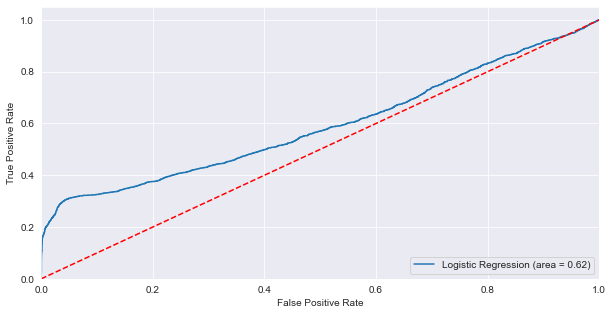

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
NBmodel = GaussianNB()
NBmodel.fit(X_train, y_train)

GaussianNB()

In [96]:
predicted = NBmodel.predict(X_test)

In [97]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Evaluation of Naive Bayes

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [99]:
cm2 = confusion_matrix(y_test,predicted)
score2 = accuracy_score(y_test,predicted)
cr2 = classification_report(y_test,predicted)
auc2 = roc_auc_score(y_test,predicted)

In [100]:
print('Confusion Matrix for Naive Bayes:''\n',cm2 )

Confusion Matrix for Naive Bayes:
 [[7082  354]
 [1575  758]]


In [101]:
print('Accuracy Score for Naive Bayes:',score2 )

Accuracy Score for Naive Bayes: 0.8025386426451019


In [102]:
print('Classification Report for Naive Bayes:''\n''\n',cr2)

Classification Report for Naive Bayes:

               precision    recall  f1-score   support

           0       0.82      0.95      0.88      7436
           1       0.68      0.32      0.44      2333

    accuracy                           0.80      9769
   macro avg       0.75      0.64      0.66      9769
weighted avg       0.79      0.80      0.78      9769



In [103]:
print('Auc Score for Naive Bayes:',auc2 )

Auc Score for Naive Bayes: 0.6386486588685805


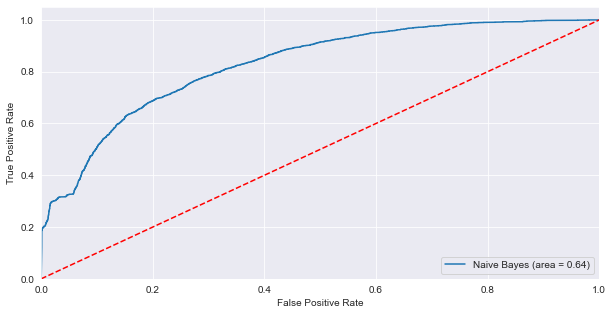

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, NBmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NBmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

# SVM

In [105]:
from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC(kernel='poly', probability=True)


In [106]:
from sklearn.svm import SVC

In [107]:
clf.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [108]:
y_pred = clf.predict(X_test)

In [109]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

# Evaluation of SVM

In [65]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
print("Classification Report for SVM:""\n",classification_report(y_test, y_pred))

In [ ]:
cm3 = confusion_matrix(y_test,y_pred)
score3 = accuracy_score(y_test,y_pred)
cr3 = classification_report(y_test,y_pred)
auc3 = roc_auc_score(y_test,y_pred)

In [ ]:
print('Confusion Matrix for SVM:''\n',cm3 )

In [ ]:
print('Accuracy Score for SVM:',score3 )

In [ ]:
print('Auc Score for svm:',auc3 )

In [ ]:
SVM_roc_auc = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVM (area = %02f)' % SVM_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Survived or Not')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

# Decision Tree

In [66]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [67]:

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

# Evaluation of Desicion Tree

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7919950864981062


In [69]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7436
           1       0.56      0.59      0.57      2333

    accuracy                           0.79      9769
   macro avg       0.72      0.72      0.72      9769
weighted avg       0.80      0.79      0.79      9769



In [70]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7906643464018835


In [71]:
print("Classification Report for Decision Tree:""\n",classification_report(y_test, y_pred))

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      7436
           1       0.56      0.58      0.57      2333

    accuracy                           0.79      9769
   macro avg       0.71      0.72      0.72      9769
weighted avg       0.79      0.79      0.79      9769



# Random Forest

In [72]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10, random_state = None)
# Train the model on training data
rf.fit(X_train,y_train);

In [73]:
y_pred = rf.predict(X_test)

In [74]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [75]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.86      0.93      0.90      7436
           1       0.70      0.53      0.60      2333

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769



# KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
print('Confusion matrix ''\n',confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Confusion matrix 
 [[6838  598]
 [1583  750]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7436
           1       0.56      0.32      0.41      2333

    accuracy                           0.78      9769
   macro avg       0.68      0.62      0.63      9769
weighted avg       0.75      0.78      0.75      9769



# Model selection
## K fold validation

In [79]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

In [80]:
print('Mean accuracy CV:',accuracies.mean())
print('Standard deviation of CV:',accuracies.std())

Mean accuracy CV: 0.8265621078804953
Standard deviation of CV: 0.002921143178511958
